### Importing the dependencies

In [1]:
# For data visualization and manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import re

print("Everything imported successfully😊")

Everything imported successfully😊


### Dataset desciption
- VoLTE stands for Voice over LTE. It is a technology that allows you to make and receive calls over the LTE network. This means that you can enjoy better call quality and voice clarity, even when you are in a poor cellular reception area.- 
Wi-Fi is a wireless networking technology that allows you to connect to the internet without using a cellular network. This is a great way to save on your data plan, especially if you are using a lot of data for streaming videos or music
  .- 
IR Blaster is a small infrared transmitter that is built into some smartphones. It allows you to use your phone as a remote control for other devices, such as your TV, air conditioner, or stere
- NFC stands for Near Field Communication. It is a short-range wireless technology that allows two devices to communicate with each other when they are brought within close proximity. The maximum distance for NFC communication is about 4 inches.o.

In [2]:
# Loading the data from csv file to dataframe
df = pd.read_csv('Data.csv')

### Exploratory data analysis

In [3]:
# Checking shape of the dataframe
print("Shape of the dataframe : ",df.shape)

Shape of the dataframe :  (1020, 11)


In [4]:
# Checking any 3 random rows of the dataframe
df.sample(3)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
272,Google Pixel 6 Pro,"₹54,300",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor, Octa Core, 2.8 GHz Processor","12 GB RAM, 128 GB inbuilt",5003 mAh Battery with 30W Fast Charging,"6.71 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 48 MP + 12 MP Triple Rear & 11.1 MP Fr...,Android v12,No FM Radio
10,Realme 10 Pro,"₹18,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.72 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13
775,Vivo Y33T,"₹15,990",81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 680, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.58 inches, 1080 x 2408 px, 90 Hz Display wit...",50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v12


In [5]:
# Let's take a look at the informatoin related to columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


model         0.000000
price         0.000000
rating       13.823529
sim           0.000000
processor     0.000000
ram           0.000000
battery       0.000000
display       0.000000
camera        0.098039
card          0.686275
os            1.666667
dtype: float64


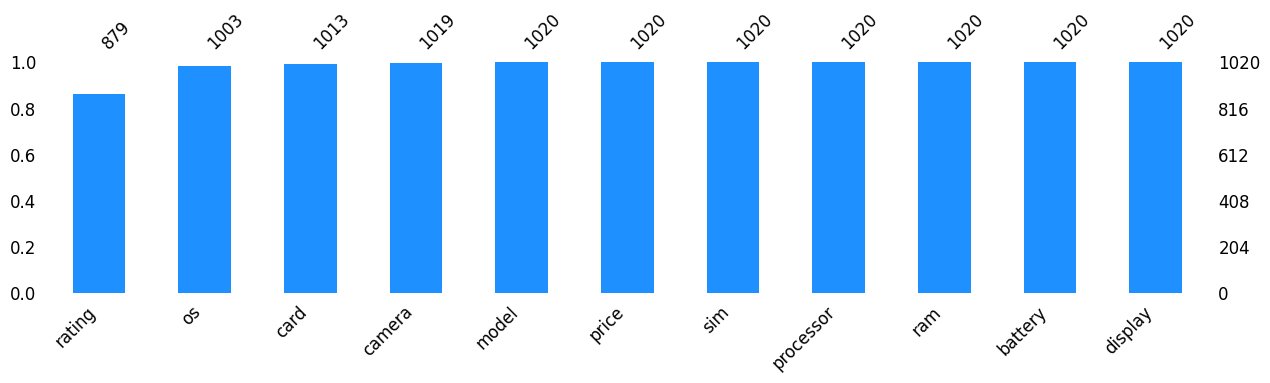

In [6]:
# Checking any missing values
print(df.isnull().mean()*100)

# Visualize missing values using a bar chart
msno.bar(df, figsize=(15, 3), color="dodgerblue", sort="ascending", fontsize=12)
plt.show()

In [7]:
# Let's check if there are any duplicate valeus
print("Duplicate values :",df.duplicated().sum())

Duplicate values : 0


### Data procesing and feature engineering

- `price`: Remove rupee and , character
- `sim`: Extracting a binary feature (called sim type 0 : Single sim and 1 : Dual sim)
- `sim`: Extracting a binary feature called (Has_5g)

In [8]:
# Dropping the os
df.drop(['os'],axis=1,inplace=True)

In [9]:
# Removing rupee and , character from the 'price' feature and converting to int
for index in range(len(df)):
    item = df.loc[index, 'price']
    item = item.replace("₹", "").replace(",", "")
    item = re.sub(r'[^\d]', '', item)  # Remove any non-digit characters
    df.loc[index, 'price'] = item

df['price'] = df['price'].astype(np.int64)

- Since NFC and IR blaster are some additional features in smartphones so let's create a binary feature where 1 will represent that this phone as one of additional feature and 0 if the smartphone doesn't have any.
- In our dataset there are few smartphones which don't even have Wifi and VoLTE so we also need to keep these phones into consideration so let's create a binary features for this. 1 : Has_Wifi_Volte and and 0 if not.
  


- 
The "G" in 3G, 4G, and 5G stands for "generation". These terms refer to the different generations of cellular network technolog.It is not necessary for a smartphone to have a "G" in order to be functional.y

In [10]:
# Empty lists to store data
Sim_type = []
Has_5g = []
Add_Features = []
Volte_Wifi = []

for item in df['sim']:
    Sim_type.append(1 if 'Dual Sim' in item.split(',') else 0)
    Has_5g.append(2 if ' 5G' in item.split(',') else (1 if ' 4G' in item.split(',') or ' 3G' in item.split(',') else 0))
    Add_Features.append(1 if 'NFC' in item.split(',') or 'IR Blaster' in item.split(',') else 0)
    Volte_Wifi.append(1 if ' VoLTE' in item.split(',') and ' Wi-Fi' in item.split(',') else 0)


# Convert lists to pandas Series
df['Sim_type'] = pd.Series(Sim_type)
df['Has_5g'] = pd.Series(Has_5g)
df['Add_Features'] = pd.Series(Add_Features)
df['Volte_Wifi'] = pd.Series(Volte_Wifi)
df.drop(['sim'],axis =1,inplace=True)

Just like we extracted some useful features from the sim feature we will now again extract some useful information from the ram feature.Non-breaking spaces are invisible characters that are used to prevent words from breaking at the end of a line. They are represented by the Unicode character \u2009.

In [11]:
str = '6 GB RAM, 128 GB inbuilt'
str.split()

['6', 'GB', 'RAM,', '128', 'GB', 'inbuilt']

In [12]:
RAM = []
Storage = []

for item in df['ram']:
    contents = item.split()
    if ('RAM,' in contents) or ('inbuilt' in contents):  # Filtered out any wrong info

        # Now we just need to figure out if both are present or only one is present
        if ('RAM,' in contents) and ('inbuilt' in contents):
            RAM.append(int(contents[0]))
            Storage.append(int(contents[3]))
        elif 'RAM,' in contents:
            RAM.append(int(contents[0]))
            Storage.append(np.nan)
        elif 'inbuilt' in contents:
            RAM.append(np.nan)
            Storage.append(int(contents[0]))
            
    else:
        RAM.append(np.nan)
        Storage.append(np.nan)

df['RAM'] = pd.Series(RAM)
df['Storage'] = pd.Series(Storage)
df.drop(['ram'], axis=1, inplace=True)

Just like the RAM and storage let's now extract the battery and charging W from the battery feature

In [13]:
str1 = '5000 mAh Battery with 455W Fast Charging'
# int(str1.split()[4][:-1])

str2 = '3095 mAh Battery with Fast Charging'
print(str1.split())
print(str2.split())

['5000', 'mAh', 'Battery', 'with', '455W', 'Fast', 'Charging']
['3095', 'mAh', 'Battery', 'with', 'Fast', 'Charging']


In [14]:
Battery = []
Charging = []

for item in df['battery']:
    contents = item.split()
    if ('Battery' in contents) or ('Charging' in contents):  # Filtered out any wrong info

        if ('Battery' in contents) and ('Charging' in contents) and len(contents) == 7:
            Battery.append(int(contents[0]))
            Charging.append(contents[4][:-1])

        # Means keywords are present but value of fast charging is not mentioned
        elif ('Battery' in contents) and ('Charging' in contents) and len(contents) == 6:
            Battery.append(int(contents[0]))
            Charging.append(np.nan)

        elif 'Battery' in contents:
            Battery.append(int(contents[0]))
            Charging.append(np.nan)
                 
    else:
        Battery.append(np.nan)
        Charging.append(np.nan)

df['Battery'] = pd.Series(Battery)
df['Charging'] = pd.Series(Charging)
df.drop(['battery'], axis=1, inplace=True)

Now first we will extract the pixels and screen size of each of the smartphone and we will calculate its PPI.The PPI of a display is calculated by dividing the total number of pixels in the display by the diagonal length of the display in inches. In your case, the display has a resolution of 1440 x 3216 pixels and a diagonal length of 6.7 inches. So, the PPI of the display would be:

PPI = pixels / diagonal_inches
= 1440 * 3216 / 6.7
= 69,1200

In [15]:
str1 = '6.7 inches, 1440 x 3216 px, 120 Hz Display with Punch Hole'
str2 = '2.4 inches, 320 x 240 px Display'
print(str1.split())
print(str2.split())

['6.7', 'inches,', '1440', 'x', '3216', 'px,', '120', 'Hz', 'Display', 'with', 'Punch', 'Hole']
['2.4', 'inches,', '320', 'x', '240', 'px', 'Display']


In [16]:
diagonal_len = []
Total_px = []

for item in df['display']:
    contents = item.split()
    if ('inches,' in contents) and ('Display'):  # Filtered out any wrong info

        diagonal_len.append(contents[0])
        px1_val = contents[2]
        px2_val = contents[4]
        total_px_value = int(px1_val) * int(px2_val)
        Total_px.append(total_px_value)
            
    else:
        diagonal_len.append(np.nan)
        Total_px.append(np.nan)

df['diagonal_len'] = pd.Series(diagonal_len)
df['Total_px'] = pd.Series(Total_px)
df.drop(['display'], axis=1, inplace=True)

- Total rear cameras
- Front camera MP

In [17]:
str = '50 MP + 48 MP + 32 MP Triple Rear & 16 MP Front Camera'
print(str.split())
print(str.split('&')[-1].split()[0])

['50', 'MP', '+', '48', 'MP', '+', '32', 'MP', 'Triple', 'Rear', '&', '16', 'MP', 'Front', 'Camera']
16


In [18]:
rear_cams = []
Total_fmp = []

df['camera'].fillna(df['camera'].mode()[0],inplace=True)

for item in df['camera']:
    contents = item.split()
    if ('Rear' in contents) and ('Front' in contents) and ('&' in contents):  # Filtered out any wrong info

        if 'Quad' in contents:
            rear_cams.append(4)
        elif 'Triple' in contents:
            rear_cams.append(3)
        elif 'Dual' in contents:
            rear_cams.append(2)
        else:
            rear_cams.append(1)
            
        Total_fmp.append(item.split('&')[-1].split()[0])
            
    else:
        rear_cams.append(np.nan)
        Total_fmp.append(np.nan)

df['rear_cams'] = pd.Series(rear_cams)
df['Total_fmp'] = pd.Series(Total_fmp)
df.drop(['camera'], axis=1, inplace=True)

In [19]:
df.head(3)

,model,price,rating,processor,card,Sim_type,Has_5g,Add_Features,Volte_Wifi,RAM,Storage,Battery,Charging,diagonal_len,Total_px,rear_cams,Total_fmp
0,OnePlus 11 5G,54999,89.0,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Memory Card Not Supported,1,2,0,1,12.0,256.0,5000.0,100,6.7,4631040.0,3.0,16
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Snapdragon 695, Octa Core, 2.2 GHz Processor","Memory Card (Hybrid), upto 1 TB",1,2,0,1,6.0,128.0,5000.0,33,6.59,2604960.0,3.0,16
2,Samsung Galaxy A14 5G,16499,75.0,"Exynos 1330, Octa Core, 2.4 GHz Processor","Memory Card Supported, upto 1 TB",1,2,0,1,4.0,64.0,5000.0,15,6.6,2600640.0,3.0,13


Since there is some wrong infromation stored in the card attribute so we will replace all the wrong information with null values.

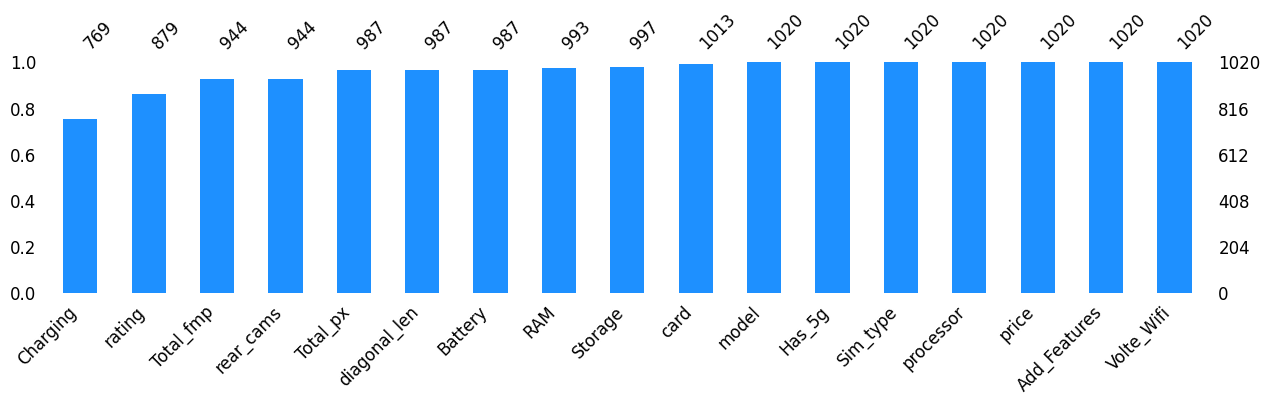

In [20]:
# Visualize missing values using a bar chart
msno.bar(df, figsize=(15, 3), color="dodgerblue", sort="ascending", fontsize=12)
plt.show()

In [21]:
1013-272

741

In [29]:
# Remvoing any unrelated information
for i in range(len(df)):
    item = df.loc[i, 'card']
    if pd.isna(item) == False and 'Memory' not in item.split():
        df.loc[i,'card'] = np.nan

# Considering only the name of the processor and brand
for i in range(len(df)):
    item1 = df.loc[i,'processor']
    item2 = df.loc[i,'model']
    df.loc[i,'processor'] = item1.split()[0]
    df.loc[i,'model'] = item2.split()[0]

In [30]:
# Let's fix some errors
df.loc[(df["processor"] == "A13") | (df["processor"] == "Apple"), "processor"] = "Bionic"
df.loc[df["processor"] == "Helio,","processor"] = "Helio"
df.loc[df["processor"] == "Unisoc,","processor"] = "Unisoc"
df.loc[df["processor"] == "Sanpdragon","processor"] = "Snapdragon"

# Sort of doing mode imputation
types = ['1', '4', 'SC9863A,', '32', '1.77', 'SC6531E,', '48','256', 'Single', 'Samsung', '(28', 'Fusion',
 '52', '2000', '800','1450', 'Dual', '8']

for type in types:
    df.loc[df["processor"] == type,"processor"] = "Snapdragon"

In [ ]:
# Imputing one missing value with mode value
df['camera'].fillna(df['camera'].mode()[0],inplace=True)

In [ ]:
Rear_cameras = []

for item in df['camera']:
    if "Rear" and "Front" in item.split(" "):
        Rear_cameras.append(item.split('&')[0])
        front_cameras.append(item.split('&')[1])

if "Rear" in item.split(" ") for item in df['camera']

In [32]:
Rear_cameras = []
front_cameras = []



for item in df['camera']:
    if "Rear" and "Front" in item.split(" "):
        Rear_cameras.append(item.split('&')[0])
        front_cameras.append(item.split('&')[1])
        

In [39]:
front_cameras = pd.Series(front_cameras)
front_cameras

0       16 MP Front Camera
1       16 MP Front Camera
2       13 MP Front Camera
3       16 MP Front Camera
4       16 MP Front Camera
              ...         
939     16 MP Front Camera
940      8 MP Front Camera
941     16 MP Front Camera
942     32 MP Front Camera
943     32 MP Front Camera
Length: 944, dtype: object

In [40]:
df.shape

(1020, 14)

In [42]:
df.head(2)

,model,price,rating,processor,battery,display,camera,card,Sim_type,Has_5g,Add_Features,Volte_Wifi,RAM,Storage,Battery_size
0,OnePlus 11 5G,54999,89.0,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,1,2,1,1,1,,5000
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Snapdragon 695, Octa Core, 2.2 GHz Processor",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",1,2,1,1,6,,5000


In [26]:
df['card'].value_counts()[:20]
#['Memory Card Not Supported', 'Memory Card (Hybrid), upto 1 TB'

Memory Card Supported, upto 1 TB      171
Memory Card Not Supported             112
Android v12                           107
Memory Card Supported, upto 512 GB    105
Memory Card (Hybrid), upto 1 TB        91
Memory Card Supported                  89
Memory Card Supported, upto 256 GB     87
Android v13                            46
Android v11                            41
Memory Card (Hybrid)                   30
Memory Card (Hybrid), upto 256 GB      13
Memory Card (Hybrid), upto 512 GB      11
Android v10                            11
Bluetooth                              11
Memory Card Supported, upto 32 GB       8
Memory Card Supported, upto 128 GB      7
iOS v14                                 6
Memory Card Supported, upto 2 TB        5
0.3 MP Rear Camera                      3
Memory Card (Hybrid), upto 128 GB       3
Name: card, dtype: int64

In [27]:
['Memory Card Supported, upto 1 TB', 'Memory Card Not Supported',
       'Memory Card Supported, upto 512 GB','Memory Card Supported',
       'Memory Card Supported, upto 256 GB',
       'Memory Card (Hybrid)', 'Memory Card (Hybrid), upto 256 GB',
       'Memory Card (Hybrid), upto 512 GB', 'Android v10', 'Bluetooth',
       'Memory Card Supported, upto 32 GB',
       'Memory Card Supported, upto 128 GB', 'iOS v14',
       'Memory Card Supported, upto 2 TB', '0.3 MP Rear Camera',
       'Memory Card (Hybrid), upto 128 GB']

Index(['Memory Card Supported, upto 1 TB', 'Memory Card Not Supported',
       'Android v12', 'Memory Card Supported, upto 512 GB',
       'Memory Card (Hybrid), upto 1 TB', 'Memory Card Supported',
       'Memory Card Supported, upto 256 GB', 'Android v13', 'Android v11',
       'Memory Card (Hybrid)', 'Memory Card (Hybrid), upto 256 GB',
       'Memory Card (Hybrid), upto 512 GB', 'Android v10', 'Bluetooth',
       'Memory Card Supported, upto 32 GB',
       'Memory Card Supported, upto 128 GB', 'iOS v14',
       'Memory Card Supported, upto 2 TB', '0.3 MP Rear Camera',
       'Memory Card (Hybrid), upto 128 GB'],
      dtype='object')

In [11]:
# Imputing the missing values with Mode value
df['ram'].fillna(df['ram'].mode()[0],inplace=True)

- Snapdragon
- Exynos
- Dimensity
- Bionic
- Helio
- Unisoc
- Tiger
- Google  Tensor

In [35]:
pd.Series(list).value_counts()

Snapdragon    407
Helio         202
Dimensity     177
Exynos         49
Bionic         39
Unisoc         28
Tiger          24
Octa           14
No             13
Google          9
Kirin           7
Quad            6
A13             5
Qualcomm        5
                4
Spreadtrum      4
1               3
4               3
32              2
SC9863A         2
1.77            2
Single          1
256             1
Samsung         1
48              1
(28             1
SC6531E         1
Sanpdragon      1
52              1
2000            1
800             1
1450            1
Fusion          1
Dual            1
Apple           1
8               1
dtype: int64

In [10]:
df.head(2)

,model,price,rating,processor,ram,battery,display,camera,card,os,Sim_type,Has_5g,Add_Features,Volte_Wifi
0,OnePlus 11 5G,54999,89.0,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,1,2,1,1
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,1,2,1,1


In [11]:
df.isnull().sum()

model             0
price             0
rating          141
processor         0
ram               0
battery           0
display           0
camera            1
card              7
os               17
Sim_type          0
Has_5g            0
Add_Features      0
Volte_Wifi        0
dtype: int64

<Axes: xlabel='price'>

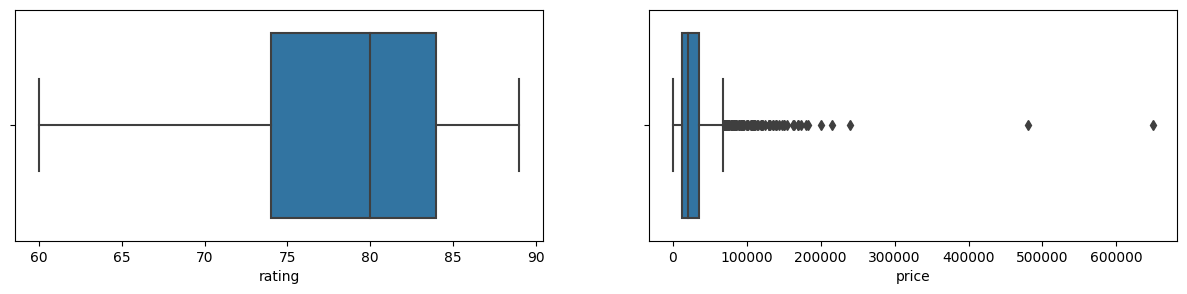

In [13]:
# Let's see if there are any outliers in the rating and price feature
fig,ax = plt.subplots(1,2,figsize = (15,3))

sns.boxplot(x = df['rating'],ax = ax[0])
sns.boxplot(x = df['price'],ax = ax[1])